In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import pandas as pd
import wmfdata as wmf

In [25]:
wmf.charting.set_mpl_style()

In [26]:
%matplotlib inline

In [28]:
frame = pd.read_csv("secrets/sampling-frame.tsv", sep = "\t").drop("email", axis=1)
frame.head()

,user,home_proj,global_edits,project_group
0,!Silent,ptwiki,1227.6,ptwiki
1,"""Yahia""",arwiki,2106.1,arwiki
2,%Pier%,itwiki,3005.0,itwiki
3,'Inyan,frwiki,3502.5,frwiki
4,(:Julien:),frwiki,5539.6,frwiki


# Frame stratification

In [29]:
pd.DataFrame(frame["project_group"].value_counts())

,project_group
enwiki,9670
commons,3043
dewiki,2621
cee_wps,2485
frwiki,2048
ruwiki,1595
meaf_wps,1522
other,1403
eswiki,1362
jawiki,1279


In [30]:
# Round the highest edit count up to the nearest hundred thousand,
# in order to make a pretty edge for the top bin
top_edge = int(np.ceil(frame["global_edits"].max() / 100000) * 100000)

# See readme for why we picked these bins
edit_bins = [10, 30, 150, 600, 1200, top_edge]

frame["binned_edits"] = pd.cut(frame["global_edits"], edit_bins, right=False)

In [31]:
frame["binned_edits"].value_counts(sort = False)

[10, 30)            1693
[30, 150)           8204
[150, 600)          8472
[600, 1200)         3782
[1200, 1200000)    11116
Name: binned_edits, dtype: int64

In [32]:
frame.groupby(["project_group", "binned_edits"]).size().unstack()

binned_edits,"[10, 30)","[30, 150)","[150, 600)","[600, 1200)","[1200, 1200000)"
project_group,,,,,
arwiki,24,79,57,39,118
asia_wps,10,37,62,35,74
cee_wps,109,537,600,341,898
commons,164,587,562,291,1439
dewiki,81,584,774,327,855
enwiki,535,2782,2688,1034,2631
eswiki,106,401,337,137,381
frwiki,114,526,522,219,667
itwiki,43,230,242,114,322


# Distribution of yearly edit counts

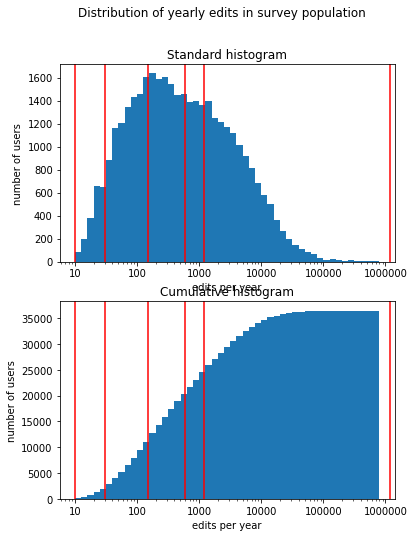

In [12]:
fig_size = plt.rcParams["figure.figsize"]

fig, (ax1, ax2) = plt.subplots(
    # 2 rows, 1 column
    2, 1,
    # Make the figure double height
    figsize = (fig_size[0], fig_size[1] * 2),
)

fig.suptitle("Distribution of yearly edits in survey population")

def set_common(ax, cumulative = False):
    ax.hist(
        frame["global_edits"],
        bins = 10**np.arange(1, 6, 0.1),
        cumulative = cumulative
    )
    
    ax.set_xscale("log", basex = 10)
    ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%d"))
    
    
    ax.set_ylabel("number of users")
    ax.set_xlabel("edits per year")

    for edge in edit_bins:
        ax.axvline(x = edge, color = "red")

set_common(ax1)
set_common(ax2, True)
ax1.set_title("Standard histogram")
ax2.set_title("Cumulative histogram")

plt.show()